# Rohith Chittimalla Final Project

In [0]:
# Fetching text data from the URL
import urllib.request
stringInURL = "https://www.gutenberg.org/files/65122/65122-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/finProj_data.txt")

Out[63]: ('/tmp/finProj_data.txt', <http.client.HTTPMessage at 0x7fc13fb0e4f0>)

In [0]:
# Moving file from tmp folder to dbfs to process the data
dbutils.fs.mv("file:/tmp/finProj_data.txt", "dbfs:/data/finProj_data.txt")

Out[64]: True

In [0]:
# Transferring file to Spark Job.

rawRDD = sc.textFile("dbfs:/data/finProj_data.txt")

In [0]:
# Cleaning the data
## Splitting the data with space and converting them into lowercase.

textRDD = rawRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# Removing the punctuations from the text by using regular expression

import re
cleanTextRDD = textRDD.map(lambda words: re.sub(r'[^a-zA-Z]','',words))
from pyspark.ml.feature import StopWordsRemover
remove = StopWordsRemover()
stopwords = remove.getStopWords()
cleanDataRDD = cleanTextRDD.filter(lambda word: word not in stopwords)

removeRDD = cleanDataRDD.filter(lambda r: r !="")


In [0]:
# Mapping words to key value pairs
IKVPairsRDD= removeRDD.map(lambda word: (word,1))
wordsCountRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
# Printing 15 results of the word count

results = wordsCountRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(15)
print(results)

[(88, 'project'), (56, 'gutenbergtm'), (47, 'work'), (33, 'works'), (31, 'gutenberg'), (31, 'said'), (27, 'renn'), (27, 'electronic'), (24, 'like'), (22, 'terms'), (22, 'foundation'), (22, 'e'), (21, 'mars'), (20, 'copyright'), (20, 'states')]

In [0]:
finalResults = wordsCountRDD.collect()
print(finalResults)

[('project', 88), ('gutenberg', 31), ('ebook', 13), ('like', 24), ('mars', 21), ('tom', 3), ('use', 13), ('anyone', 5), ('anywhere', 2), ('united', 15), ('world', 2), ('restrictions', 2), ('whatsoever', 2), ('may', 16), ('give', 5), ('away', 7), ('reuse', 2), ('online', 5), ('check', 7), ('country', 4), ('using', 7), ('title', 1), ('april', 1), ('language', 1), ('set', 10), ('encoding', 1), ('utf', 1), ('produced', 3), ('greg', 1), ('weeks', 1), ('mary', 1), ('meehan', 1), ('team', 1), ('httpwwwpgdpnet', 1), ('start', 4), ('nobody', 4), ('figure', 1), ('kettering', 15), ('realistic', 2), ('movie', 7), ('good', 4), ('gruesome', 1), ('imagination', 1), ('science', 1), ('research', 3), ('uncover', 1), ('evidence', 1), ('us', 12), ('copyright', 20), ('publication', 1), ('anything', 6), ('ferdinand', 3), ('told', 3), ('heavy', 5), ('fivedollaranounce', 1), ('tobacco', 1), ('blew', 1), ('cloud', 1), ('around', 7), ('ill', 2), ('said', 31), ('beautifully', 1), ('grinned', 1), ('rumor', 2), ('leave', 1), ('go', 7), ('work', 47), ('maneuver', 1), ('private', 1), ('subject', 2), ('damned', 2), ('maybe', 9), ('let', 5), ('something', 8), ('idea', 7), ('always', 2), ('cast', 7), ('look', 6), ('house', 8), ('selling', 1), ('hire', 2), ('stupendous', 3), ('couldnt', 6), ('understand', 2), ('right', 12), ('manny', 4), ('seen', 3), ('seven', 1), ('thousand', 1), ('iso', 1), ('countryand', 1), ('think', 5), ('theyre', 2), ('hot', 1), ('different', 3), ('ketterings', 2), ('em', 3), ('mind', 4), ('terrif', 1), ('im', 4), ('modest', 1), ('toward', 4), ('end', 2), ('way', 7), ('preview', 1), ('room', 4), ('nice', 7), ('simple', 1), ('studios', 1), ('sequences', 2), ('super', 1), ('newsreel', 2), ('fabulous', 1), ('influence', 1), ('must', 12), ('paid', 7), ('crew', 4), ('third', 1), ('touch', 2), ('new', 9), ('factors', 1), ('known', 1), ('managed', 1), ('booth', 1), ('sat', 3), ('came', 5), ('space', 2), ('ravine', 1), ('bunch', 1), ('tawnies', 4), ('telephoto', 1), ('got', 11), ('rocks', 1), ('hubbard', 1), ('films', 4), ('stood', 1), ('cut', 2), ('loose', 2), ('blaster', 2), ('sparks', 1), ('burst', 1), ('howled', 1), ('stop', 1), ('hurled', 1), ('gun', 1), ('mouth', 3), ('grabbed', 1), ('mandibles', 1), ('call', 3), ('closeup', 1), ('terror', 1), ('best', 1), ('acting', 2), ('ever', 2), ('yellow', 2), ('choppers', 3), ('close', 2), ('realism', 1), ('murder', 1), ('spacemonster', 1), ('suppose', 3), ('kept', 2), ('watching', 2), ('john', 1), ('public', 5), ('alikecalloused', 1), ('felt', 4), ('cold', 1), ('two', 5), ('tried', 2), ('beat', 2), ('dummy', 1), ('kind', 4), ('arden', 12), ('ripped', 1), ('slashed', 1), ('ragged', 2), ('thought', 6), ('point', 2), ('picked', 3), ('crazy', 1), ('needed', 1), ('looked', 4), ('doubles', 3), ('earth', 2), ('scattered', 1), ('convincing', 1), ('pretty', 2), ('sure', 1), ('used', 5), ('though', 2), ('renns', 1), ('ideaone', 1), ('liked', 4), ('shed', 2), ('rest', 5), ('theyd', 2), ('chance', 2), ('thorough', 2), ('lookover', 1), ('person', 5), ('phony', 1), ('grin', 2), ('possibility', 2), ('change', 2), ('eyes', 7), ('ice', 1), ('true', 1), ('shock', 1), ('greetings', 3), ('chortled', 1), ('shake', 1), ('ten', 3), ('watchdog', 2), ('hes', 1), ('high', 1), ('weighs', 1), ('fifteen', 1), ('keeps', 1), ('prowlers', 1), ('nightso', 1), ('curious', 2), ('days', 8), ('worry', 1), ('tied', 1), ('cables', 3), ('thick', 1), ('holding', 1), ('guests', 1), ('guess', 3), ('make', 9), ('took', 2), ('guided', 1), ('passed', 3), ('leaped', 2), ('ear', 1), ('mandible', 1), ('graze', 1), ('chummily', 1), ('scared', 1), ('anybody', 2), ('lutz', 5), ('critic', 2), ('sally', 1), ('flours', 1), ('luckarden', 1), ('smirked', 1), ('gave', 2), ('far', 1), ('love', 5), ('wonderful', 4), ('exhibited', 1), ('considerably', 1), ('sign', 1), ('hear', 6), ('full', 14), ('green', 3), ('sky', 2), ('thatd', 1), ('turn', 1), ('bars', 4), ('kinda', 1), ('wouldnt', 3), ('somethings', 1), ('heard', 3), ('lousy', 2), ('matter', 2), ('looking'

Count Words
0 88 project
1 56 gutenbergtm
2 47 work
3 33 works
4 31 gutenberg
5 31 said
6 27 renn
7 27 electronic
8 24 like
9 22 terms
10 22 foundation
11 22 e
12 21 mars
13 20 copyright
14 20 states
Out[71]:

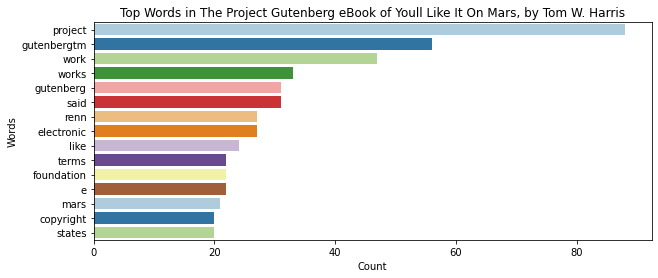

Text(0.5, 1.0, 'Top Words in The Project Gutenberg eBook of Youll Like It On Mars, by Tom W. Harris')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from collections import Counter
 
source = 'The Project Gutenberg eBook of Youll Like It On Mars, by Tom W. Harris'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'
 
# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(results, columns =[xlabel, ylabel]) 
print(df)
 
# create plot (using matplotlib)
plot.figure(figsize=(10,4))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)